In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
plt.style.use('seaborn')
pd.set_option('max_colwidth', 250)
pd.set_option('display.float_format', lambda x: '%.3f' %x)

C:\Users\05jad\AppData\Local\Temp\ipykernel_3504\851013344.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [6]:
st_tw = pd.read_csv('C:/Users/05jad/Downloads/state_tw_cov_posts_20_21.csv', low_memory=False)

In [7]:
st_tws=st_tw.sample(frac=0.5, random_state=10)

In [8]:
st_tws.head()

,Unnamed: 0,date,url,author,name,message,hashtags,engagement_type,followers,shares,reply_to,likes,replies,level,platform,is_quote
58238,33469,2021-05-01 20:50:03,http://twitter.com/WV_DHHR/statuses/1388596603733299202,wv_dhhr,WV_DHHR (WV Department of Health & Human Resources • 😷),"Marshall County: Free #COVID19 testing is available May 7, 12 p.m.-6 p.m. at the Benwood City Building. To find additional sites, visit: https://t.co/6M6AQnP1aI https://t.co/ORCWDNCSKx",#covid19,NaN,7022,1,NaN,NaN,0.000,state,tw,NaN
35973,15171,2020-10-01 19:30:35,http://twitter.com/WADeptHealth/statuses/1311750376765358080,wadepthealth,WADeptHealth (WA Dept. of Health),Soon the WA State Department of Health will receive and distribute the first batch of Abbott BinaxNOW antigen test kits for COVID-19 from the federal government. These are rapid tests that can return results in as little as 15 minutes. Learn more...,NaN,NaN,40850,11,NaN,NaN,2.000,state,tw,NaN
41864,34528,2020-05-08 18:13:59,http://twitter.com/Delaware_DHSS/statuses/1258822469974208514,delaware_dhss,Delaware_DHSS (DHSS),"@JohnCarneyDE said the COVID-19 indicator his team is looking at is current hospitalizations and it is starting to trend down ""and that's a really good thing."" For a closer look at the latest data: https://t.co/lEHO9CevEs https://t.co/5KaYey7RYw",NaN,NaN,9361,2,NaN,NaN,2.000,state,tw,NaN
58655,34321,2021-04-27 15:31:00,http://twitter.com/RIHEALTH/statuses/1387066758452948994,rihealth,RIHEALTH (Rhode Island Department of Health),"If you have not yet been vaccinated, RIDOH recommends you get tested for COVID-19 weekly to keep you and your household safe. Once you’ve gotten any COVID-19 vaccine, continue to take part in testing. Visit https://t.co/2pJfKJBNb6 to book your fr...",NaN,NaN,21348,4,NaN,NaN,1.000,state,tw,NaN
62341,41567,2021-03-17 18:01:02,http://twitter.com/WV_DHHR/statuses/1372246615449288704,wv_dhhr,WV_DHHR (WV Department of Health & Human Resources • 😷),"Boone County: Free #COVID19 testing has been added March 19, 10 a.m.-5 p.m. at the Boone County Health Department in Danville. For additional sites in Boone County and statewide, visit https://t.co/6M6AQnP1aI https://t.co/H5qUjqnY1m",#covid19,NaN,6931,0,NaN,NaN,0.000,state,tw,NaN


In [11]:
type(st_tws['date'])

pandas.core.series.Series

In [12]:
st_tws['date']=pd.to_datetime(st_tw['date'])

In [14]:
type(st_tws['followers'])

pandas.core.series.Series

In [15]:
type(st_tws['shares'])

pandas.core.series.Series

In [16]:
st_tws.dtypes

Unnamed: 0                  int64
date               datetime64[ns]
url                        object
author                     object
name                       object
message                    object
hashtags                   object
engagement_type            object
followers                   int64
shares                      int64
reply_to                   object
likes                     float64
replies                   float64
level                      object
platform                   object
is_quote                   object
dtype: object

In [18]:
st_tws['followers'].describe()

count    33262.000
mean     28524.503
std      22302.844
min        534.000
25%       8976.250
50%      22437.000
75%      42362.000
max     107469.000
Name: followers, dtype: float64

In [19]:
st_tws['shares'].describe()

count   33262.000
mean       12.965
std        37.537
min         0.000
25%         2.000
50%         5.000
75%        13.000
max      2388.000
Name: shares, dtype: float64

In [24]:
st_tws_gpD = st_tws.groupby(st_tws['date'].dt.to_period('D')).agg({'shares':'mean', 'followers':'mean'})

In [25]:
st_tws_gpD

,shares,followers
date,,
2020-01-21,17.667,12744.333
2020-01-22,0.000,5518.000
2020-01-23,19.250,11743.000
2020-01-24,13.700,9426.300
2020-01-25,18.667,10513.333
...,...,...
2021-12-27,6.902,35480.294
2021-12-28,8.756,31381.267
2021-12-29,12.820,33055.140


In [26]:
st_tws_gpD.reset_index(inplace=True)

In [27]:
type(st_tws_gpD['shares'][0]), type(st_tws_gpD['followers'][0]), type(st_tws_gpD['date'][0])

(numpy.float64, numpy.float64, pandas._libs.tslibs.period.Period)

In [28]:
st_tws_gpD['date'] = st_tws_gpD['date'].dt.to_timestamp()

Text(0.5, 1.0, 'Average Followers by Day')

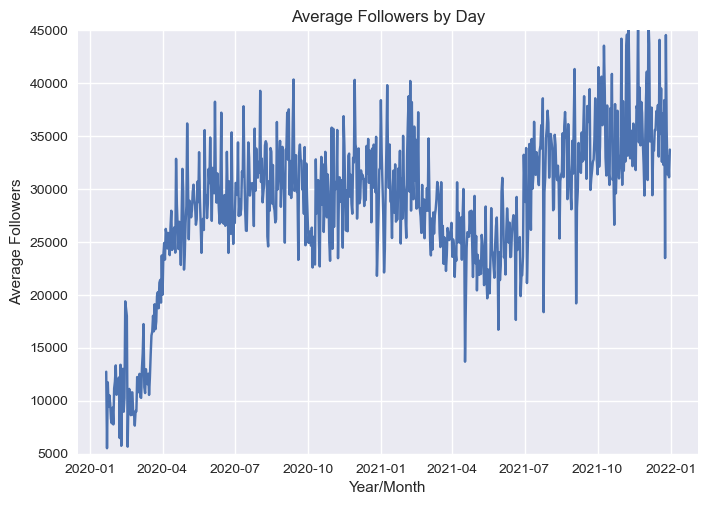

In [32]:
plt.plot('date', "followers", data=st_tws_gpD)
plt.ylim(5000, 45000)
plt.ylabel('Average Followers')
plt.xlabel('Year/Month')
plt.title('Average Followers by Day')

Text(0.5, 1.0, 'Average Shares by Day')

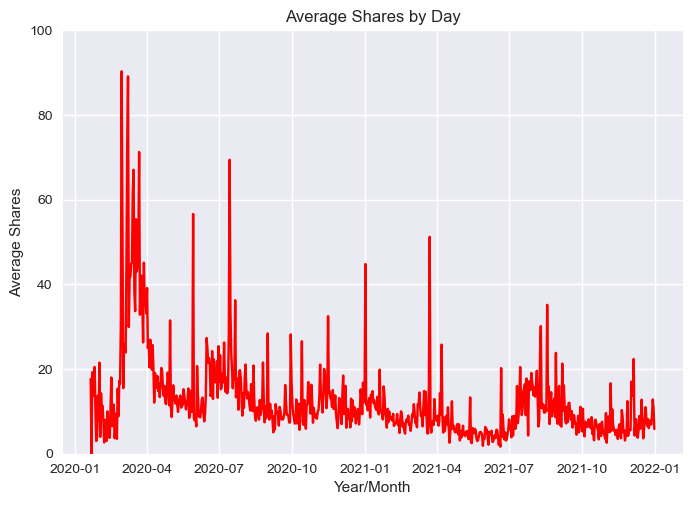

In [34]:
plt.plot('date', "shares", data=st_tws_gpD, color='red')
plt.ylim(0, 100)
plt.ylabel('Average Shares')
plt.xlabel('Year/Month')
plt.title('Average Shares by Day')

In [35]:
st_tws_med = st_tws.groupby(st_tws['date'].dt.to_period('D')).agg({'shares':'median', 'followers':'median'})

In [36]:
st_tws_med

,shares,followers
date,,
2020-01-21,21.000,13064.000
2020-01-22,0.000,5518.000
2020-01-23,6.000,13194.500
2020-01-24,5.500,8716.500
2020-01-25,8.000,10806.000
...,...,...
2021-12-27,5.000,34007.000
2021-12-28,3.000,26045.000
2021-12-29,5.000,25460.000


In [37]:
st_tws_med.reset_index(inplace=True)

In [38]:
type(st_tws_med['shares'][0]), type(st_tws_med['followers'][0]), type(st_tws_med['date'][0])

(numpy.float64, numpy.float64, pandas._libs.tslibs.period.Period)

In [39]:
st_tws_med['date']= st_tws_med['date'].dt.to_timestamp()

Text(0.5, 1.0, 'Median Followers by Day')

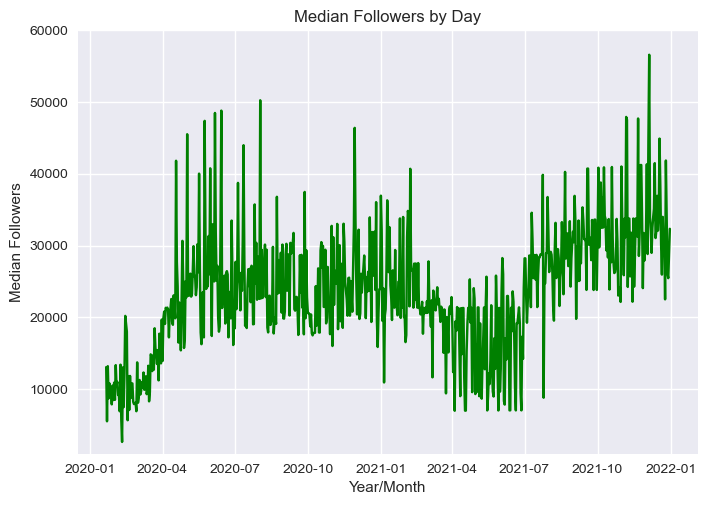

In [43]:
plt.plot('date', "followers", data=st_tws_med, color='green')
plt.ylim(1000, 60000)
plt.ylabel('Median Followers')
plt.xlabel('Year/Month')
plt.title('Median Followers by Day')

Text(0.5, 1.0, 'Median Shares by Day')

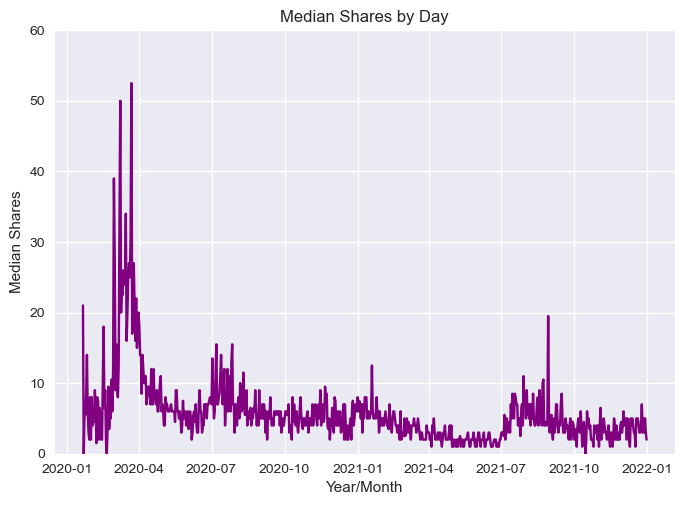

In [49]:
plt.plot('date', "shares", data=st_tws_med, color='purple')
plt.ylim(0, 60)
plt.ylabel('Median Shares')
plt.xlabel('Year/Month')
plt.title('Median Shares by Day')

In [50]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\05jad\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\05jad\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\05jad\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [51]:
stopwords=stopwords.words('english')

In [52]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [53]:
def lemmatize_list(data):
    wnl = WordNetLemmatizer()
    lemma_list = []

    for i in data:
        txt = i
        lemmatized = [wnl.lemmatize(i,j[0].lower()) if j[0].lower() in ['a','n','v','r'] else wnl.lemmatize(i) for i,j in pos_tag(word_tokenize(txt))]
        lemma_list.append(lemmatized)

    return lemma_list

In [54]:
def remove_punc(texts):
    return [[word.lower() for word in doc if word.isalpha()] for doc in texts]

In [55]:
def remove_stopwords(texts):
    return [[word for word in doc if word not in stopwords] for doc in texts]

In [57]:
st_tws_clean=st_tws.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

In [58]:
st_tws_clean

,Unnamed: 0,date,url,author,name,message,hashtags,engagement_type,followers,shares,reply_to,likes,replies,level,platform,is_quote
58238,33469,2021-05-01 20:50:03,http://twitter.com/WV_DHHR/statuses/1388596603733299202,wv_dhhr,WV_DHHR (WV Department of Health & Human Resources ),"Marshall County: Free #COVID19 testing is available May 7, 12 p.m.-6 p.m. at the Benwood City Building. To find additional sites, visit: https://t.co/6M6AQnP1aI https://t.co/ORCWDNCSKx",#covid19,nan,7022,1,nan,nan,0.0,state,tw,nan
35973,15171,2020-10-01 19:30:35,http://twitter.com/WADeptHealth/statuses/1311750376765358080,wadepthealth,WADeptHealth (WA Dept. of Health),Soon the WA State Department of Health will receive and distribute the first batch of Abbott BinaxNOW antigen test kits for COVID-19 from the federal government. These are rapid tests that can return results in as little as 15 minutes. Learn more...,nan,nan,40850,11,nan,nan,2.0,state,tw,nan
41864,34528,2020-05-08 18:13:59,http://twitter.com/Delaware_DHSS/statuses/1258822469974208514,delaware_dhss,Delaware_DHSS (DHSS),"@JohnCarneyDE said the COVID-19 indicator his team is looking at is current hospitalizations and it is starting to trend down ""and that's a really good thing."" For a closer look at the latest data: https://t.co/lEHO9CevEs https://t.co/5KaYey7RYw",nan,nan,9361,2,nan,nan,2.0,state,tw,nan
58655,34321,2021-04-27 15:31:00,http://twitter.com/RIHEALTH/statuses/1387066758452948994,rihealth,RIHEALTH (Rhode Island Department of Health),"If you have not yet been vaccinated, RIDOH recommends you get tested for COVID-19 weekly to keep you and your household safe. Once youve gotten any COVID-19 vaccine, continue to take part in testing. Visit https://t.co/2pJfKJBNb6 to book your fre...",nan,nan,21348,4,nan,nan,1.0,state,tw,nan
62341,41567,2021-03-17 18:01:02,http://twitter.com/WV_DHHR/statuses/1372246615449288704,wv_dhhr,WV_DHHR (WV Department of Health & Human Resources ),"Boone County: Free #COVID19 testing has been added March 19, 10 a.m.-5 p.m. at the Boone County Health Department in Danville. For additional sites in Boone County and statewide, visit https://t.co/6M6AQnP1aI https://t.co/H5qUjqnY1m",#covid19,nan,6931,0,nan,nan,0.0,state,tw,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12196,38406,2021-02-10 17:43:33,http://twitter.com/CDPHE/statuses/1359558639732682752,cdphe,CDPHE (Colorado Department of Public Health & Environment),"Staying informed can help you and the people you love stay healthy, including those who may be at extra risk from getting very sick or even dying from COVID-19. Get information about the COVID-19 vaccines at https://t.co/vP9W2Bgwzh #VaccineFactsC...",#vaccinefactsco,nan,45958,5,nan,nan,1.0,state,tw,nan
10075,32585,2021-03-29 19:10:24,http://twitter.com/CAPublicHealth/statuses/1376612724415684609,capublichealth,CAPublicHealth (CA Public Health),"California COVID-19, By The Numbers: Confirmed cases to date: 3,564,468 Note: Numbers may not represent true day-over-day change as reporting of test results can be delayed More information at https://t.co/TLLUGwPGY7. https://t.co/NGp4dMCY9F",nan,nan,88633,27,nan,nan,3.0,state,tw,nan
3508,11643,2021-10-07 19:28:29,http://twitter.com/CTDPH/statuses/1446195745057501192,ctdph,CTDPH (CT Public Health),"As COVID-19 cases slow in Connecticut, public health commissioner worried about increases in nearby states. Click here to read the full Hartford Courant article: https://t.co/5ppsFKk5YJ",nan,nan,17836,2,nan,nan,1.0,state,tw,nan
3106,10600,2021-10-18 17:01:10,http://twitter.com/LADeptHealth/statuses/1450144937459298305,ladepthealth,LADeptHealth (Louisiana Department of Health),"Today, LDH reports 1,077 #COVID19 cases reported to the state since 10/15/21. The vast majority (97.3%) of these cases are tied to community spread. https://t.co/9EsxtWuVEq",#covid19,nan,24130,5,nan,nan,2.0,state,tw,nan


In [61]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\05jad\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [62]:
st_tws_lemma = lemmatize_list(st_tws_clean['message'].tolist())

In [63]:
st_tws_lemma_noPunc = remove_punc(st_tws_lemma)

In [64]:
tws_allClean = remove_stopwords(st_tws_lemma_noPunc)

In [65]:
tws_allClean

[['marshall',
  'county',
  'free',
  'testing',
  'available',
  'may',
  'benwood',
  'city',
  'building',
  'find',
  'additional',
  'site',
  'visit',
  'http',
  'http'],
 ['soon',
  'wa',
  'state',
  'department',
  'health',
  'receive',
  'distribute',
  'first',
  'batch',
  'abbott',
  'binaxnow',
  'antigen',
  'test',
  'kit',
  'federal',
  'government',
  'rapid',
  'test',
  'return',
  'result',
  'little',
  'minute',
  'learn',
  'http'],
 ['johncarneyde',
  'say',
  'indicator',
  'team',
  'look',
  'current',
  'hospitalization',
  'start',
  'trend',
  'really',
  'good',
  'thing',
  'closer',
  'look',
  'latest',
  'data',
  'http',
  'http'],
 ['yet',
  'vaccinate',
  'ridoh',
  'recommend',
  'get',
  'test',
  'weekly',
  'keep',
  'household',
  'safe',
  'youve',
  'get',
  'vaccine',
  'continue',
  'take',
  'part',
  'test',
  'visit',
  'http',
  'book',
  'free',
  'test',
  'today',
  'http'],
 ['boone',
  'county',
  'free',
  'testing',
  'add',

In [66]:
type(tws_allClean)

list

In [73]:
for item in tws_allClean[:]:
    if item == 'http':
        tws_allClean.remove(item)

In [74]:
tws_allClean

[['marshall',
  'county',
  'free',
  'testing',
  'available',
  'may',
  'benwood',
  'city',
  'building',
  'find',
  'additional',
  'site',
  'visit',
  'http',
  'http'],
 ['soon',
  'wa',
  'state',
  'department',
  'health',
  'receive',
  'distribute',
  'first',
  'batch',
  'abbott',
  'binaxnow',
  'antigen',
  'test',
  'kit',
  'federal',
  'government',
  'rapid',
  'test',
  'return',
  'result',
  'little',
  'minute',
  'learn',
  'http'],
 ['johncarneyde',
  'say',
  'indicator',
  'team',
  'look',
  'current',
  'hospitalization',
  'start',
  'trend',
  'really',
  'good',
  'thing',
  'closer',
  'look',
  'latest',
  'data',
  'http',
  'http'],
 ['yet',
  'vaccinate',
  'ridoh',
  'recommend',
  'get',
  'test',
  'weekly',
  'keep',
  'household',
  'safe',
  'youve',
  'get',
  'vaccine',
  'continue',
  'take',
  'part',
  'test',
  'visit',
  'http',
  'book',
  'free',
  'test',
  'today',
  'http'],
 ['boone',
  'county',
  'free',
  'testing',
  'add',